In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import random

In [3]:
# Parametros reales
m_true = -1
b_true = -2.5

# Generar datos "sinteticos"
N = 50 # Numero de datos
np.random.seed(0) # Para asegurarnos de que cada vez que corramos el notebook obtengamos lo mismo
x=np.linspace(0,10,N) # Coorenadas en X 
yerr = np.random.normal(0,1,size=N) # Errores aleatorios que siguen una distribución normal de media 0 con dispersión 1.
y = m_true*x+b_true
y += yerr
yerr += np.random.normal(0,0.3,size=N) # También agregamos otro tipo error más pequeño; por ejemplo, ruido.
yerr = np.abs(yerr) # Los valores del error siempre son positivos

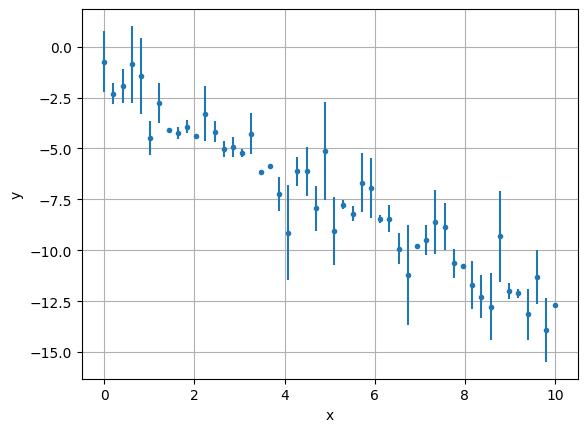

In [4]:
plt.errorbar(x,y,yerr=yerr,fmt='.')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

In [48]:
def modeloLonieal(m,b, x):
    return m * x + b

def loglike(GuessM,GuessB,x_obs,y_obs,y_err):
    y_model = modeloLonieal(GuessM,GuessB, x_obs)
    chi_square = np.sum(((y_obs - y_model) / y_err) ** 2)
    return -0.5*chi_square

def logPrior(Guess, bounds):
    if Guess[0]>bounds[0][0] and Guess[0]<bounds[0][1] and Guess[1]>bounds[1][0] and Guess[1]<bounds[1][1] :
        return 0
    else:
        return -np.inf
    

In [46]:
m_Max = 5
m_Min = -5
b_Max = 5
b_Min = -5
m0 = random.uniform(m_Max,m_Min) #Guess Inicial
b0 = random.uniform(b_Max,b_Min)
sigmaM = 0.25
sigmaB = 0.25

In [50]:
CaminanteM, CaminanteB = [m0],[b0]
Nsteps = 200
for i in range(Nsteps):
    guessPrevioM, guessPrevioB  = CaminanteM[len(CaminanteM)-1], CaminanteB[len(CaminanteB)-1]
    GuessM, GuessB = np.random.normal(CaminanteM[len(CaminanteM)-1],sigmaM),np.random.normal(CaminanteB[len(CaminanteB)-1],sigmaB)
    loglikehood = loglike(GuessM, GuessB, x, y, yerr)
    logPri = logPrior([GuessM, GuessB],[[m_Min,m_Max],[b_Min,b_Max]])
    lnP = loglikehood + logPri
    if lnP != -np.inf:
        print(loglike(guessPrevioM, guessPrevioB, x, y, yerr))
        pacc = math.exp(loglikehood)/math.exp(loglike(guessPrevioM, guessPrevioB, x, y, yerr))
        if pacc>=1:
            CaminanteM.append(GuessM)
            CaminanteB.append(GuessB)  
        else:
            u = np.random.uniform()
            if pacc > u:
                CaminanteM.append(GuessM)
                CaminanteB.append(GuessB) 
            else:
                CaminanteM.append(CaminanteM[len(CaminanteM)-1])
                CaminanteB.append(CaminanteB[len(CaminanteB)-1]) 
    else:
        CaminanteM.append(CaminanteM[len(CaminanteM)-1])
        CaminanteB.append(CaminanteB[len(CaminanteB)-1])
            

plt.scatter(CaminanteB[0],CaminanteM[0],color='r', sizes = [25])
plt.scatter(CaminanteB[len(CaminanteB)-1],CaminanteM[len(CaminanteM)-1],color='g', sizes = [25])
plt.scatter(b_true,m_true,color='k', sizes = [25])
plt.scatter(CaminanteB,CaminanteM,color='b', sizes = [1])
plt.grid()
plt.xlabel('Ordenada al origen')
plt.ylabel('Pendiente')
        

-3788748.93687653


ZeroDivisionError: float division by zero